In [92]:
#Task1 Supervised Machine Learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [93]:
data= pd.read_csv("C:/Users/user/Desktop/taskOns.txt",delimiter=",",header=0)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


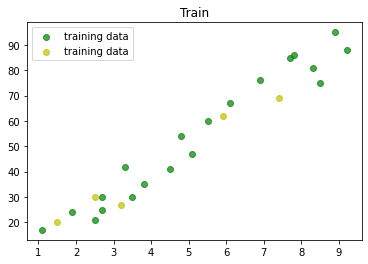

In [94]:
X_train , X_test , y_train , y_test = train_test_split(data.Hours,data.Scores,test_size=0.2,random_state=0)
plt.scatter(X_train,y_train,label='training data', color='g', alpha=.7)
plt.scatter(X_test,y_test,label='training data', color='y', alpha=.7)
plt.legend()
plt.title("Train")
plt.show()

In [95]:
 data.columns

Index(['Hours', 'Scores'], dtype='object')

In [96]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [97]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [98]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


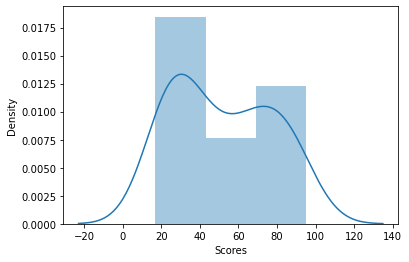

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


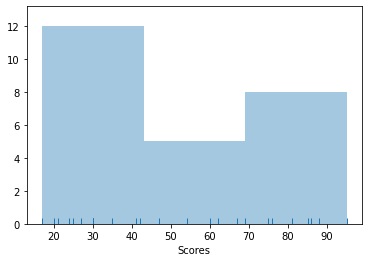

In [99]:
sns.distplot(data["Scores"])
plt.show()
sns.distplot(data["Scores"], kde=False, rug=True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

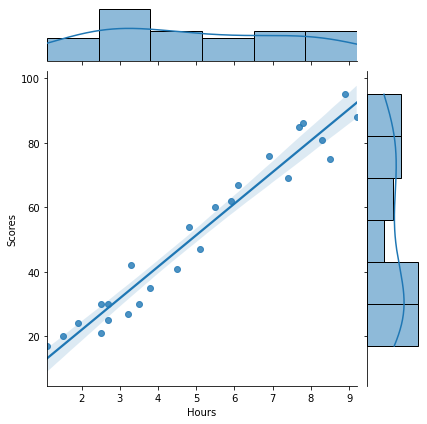

In [100]:
sns.jointplot(data['Hours'], data['Scores'], kind = "reg").annotate(stats.pearsonr)
plot.show()

In [101]:
#performing simple linear regression
mean_x = np.mean(data['Hours'])
mean_y = np.mean(data['Scores'])
num = 0
den = 0
x = list(data['Hours'])
y = list(data['Scores'])
for i in range(len(data)):
     num += (x[i]-mean_x)*(y[i]-mean_y)
     den += (x[i]-mean_x)**2
B1 = num/den

In [102]:
B1

9.775803390787475

In [103]:
B0 = mean_y - B1*mean_x

In [104]:
B0

2.4836734053731746

In [105]:
#Prediction
data['predicted_Scores'] = B0 + B1*data['Hours']

In [106]:
data.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

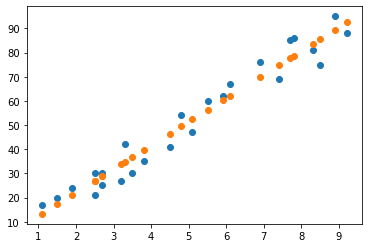

In [107]:
plt.scatter(data['Hours'], data['Scores'])
plt.scatter(data['Hours'], data['predicted_Scores'])
plt.plot()

In [108]:
#prediction a value (9.25)
B0 + B1*9.25

92.90985477015732

In [109]:
y = list(data['Scores'].values)
y_pred = list(data['predicted_Scores'].values)

In [110]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(data))])
rmse = (np.sqrt(s/len(data)))/mean_y

In [111]:
rmse

0.10439521325937494

In [112]:
model = smf.ols('Scores ~ Hours', data = data)
model = model.fit()

In [113]:
data['pred_ols'] = model.predict(data['Hours'])

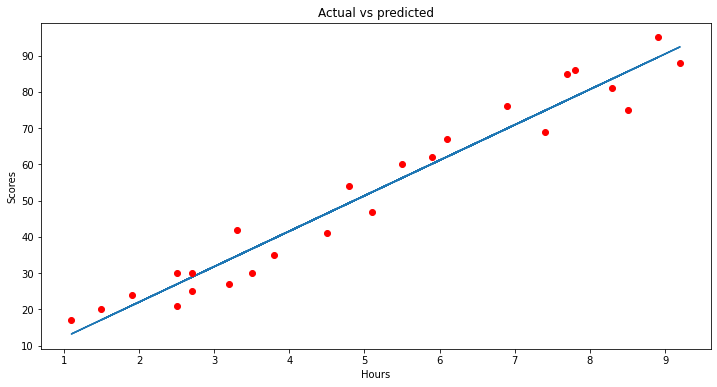

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(data['Hours'], data['pred_ols'])
plt.plot(data['Hours'], data['Scores'], 'ro')
plt.title('Actual vs predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()